# A high-level API for statistical graphics

데이터를 시각화하는 데 가장 좋은 정답은 없다.
- 다양한 질문에 가장 잘 답하는 것은 다양한 plot을 활용하는 것
- seaborn은 일관된 데이터셋 기반의 API를 사용해 쉽게 시각화를 하게 해준다.

relplot()
- 다양한 통계적 관계(relationships)를 시각화하기 때문에 이름이 relplot
- 일반적으로 scatter plot을 많이 사용
- 시간으로 측정된 하나의 변수를 나타낼 땐 line plot을 주로 사용
- kind라는 파라미터로 쉽게 그래프를 바꿀 수 있다.

In [2]:
import seaborn as sns

In [3]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


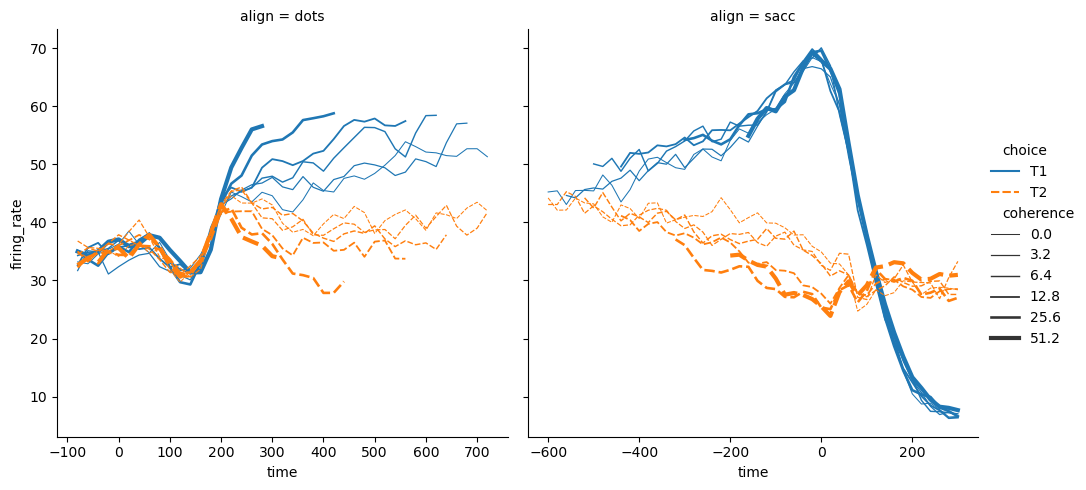

In [4]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

size와 style 파라미터
- 둘 다 scatter plot과 line plot에 사용되지만 시각화를 하는데 다르게 영향을 준다.

1. scatter plot
: marker area와 symbol을 조절

2. line plot
: 선의 너비를 조절

sns.relplot()의 문서 중 발췌

size : vector or key in `data`
    Grouping variable that will produce elements with different sizes.
    Can be either categorical or numeric, although size mapping will
    behave differently in latter case.
    
style : vector or key in `data`
    Grouping variable that will produce elements with different styles.
    Can have a numeric dtype but will always be treated as categorical.

## Statistical estimation

- 우리는 종종 한 변수의 평균값(average value)을 다른 변수의 함수로 보는데 관심이 많음
- 많은 seaborn 함수들은 평균을 구하기 위한 통계적 추정을 자동으로 구해줌

In [5]:
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


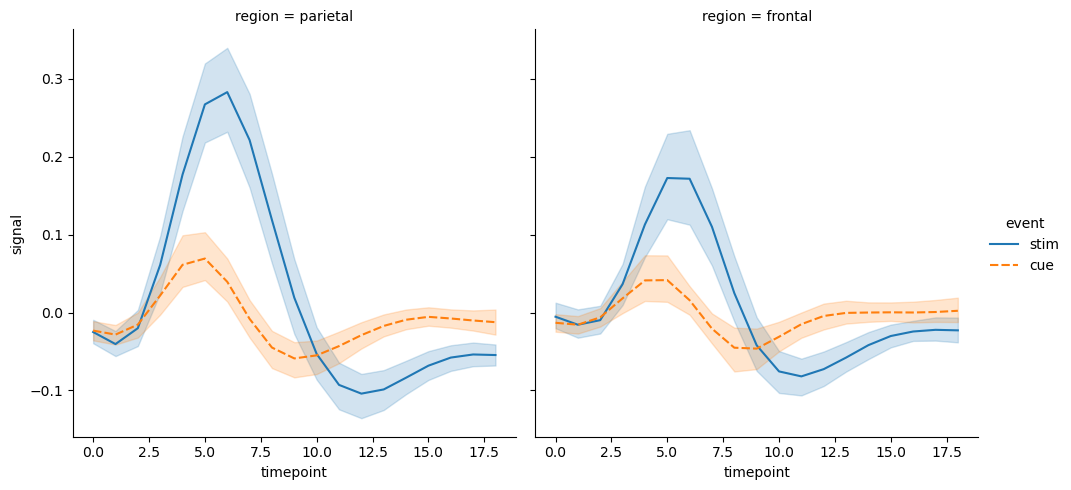

In [9]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

- 통계값이 추정되면, seaborn은 bootstrapping을 사용해 신뢰구간을 계산하고 추정치의 불확실성을 나타내는 error bar를 그림.

- seaborn의 통계적 추정은 기술통계를 넘어섬
- 예를 들어, `Implot()`을 사용해 선형회귀모델을 추가함으로써 scatterplot을 향상시킬 수 있음

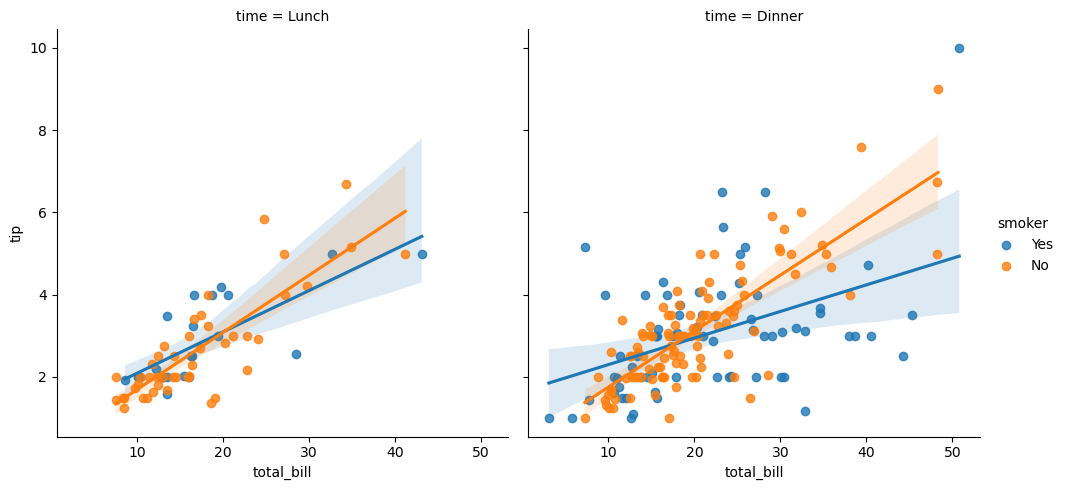

In [4]:
tips = sns.load_dataset("tips")
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Distributional representations

- 통계적 분석은 데이터셋 변수의 분포에 대한 지식이 있어야 함.
- seaborn의 함수 `displot()`은 다양한 분포를 시각화할 수 있게 함.
- 이것은 히스토그램과 같은 고전적인 기술과 커널밀도추정과 같은 계산집중적인 접근방식을 포함한다.

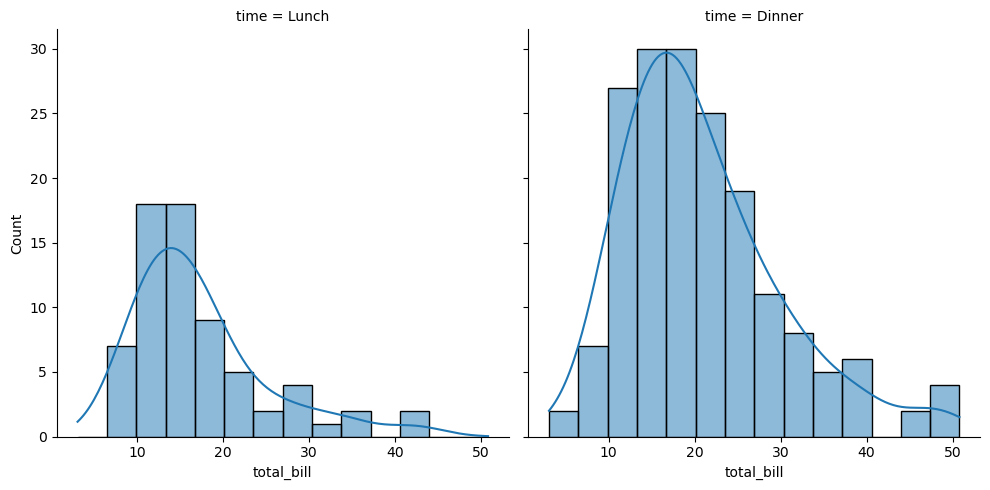

In [12]:
# kdeplot : Plot univariate or bivariate distributions using kernel density estimation.

sns.displot(data=tips, x="total_bill", col="time", kde=True)

- seaborn은 또한 강력하지만 덜 친숙한 기술(경험누적분포)을 향상시키려 노력함.

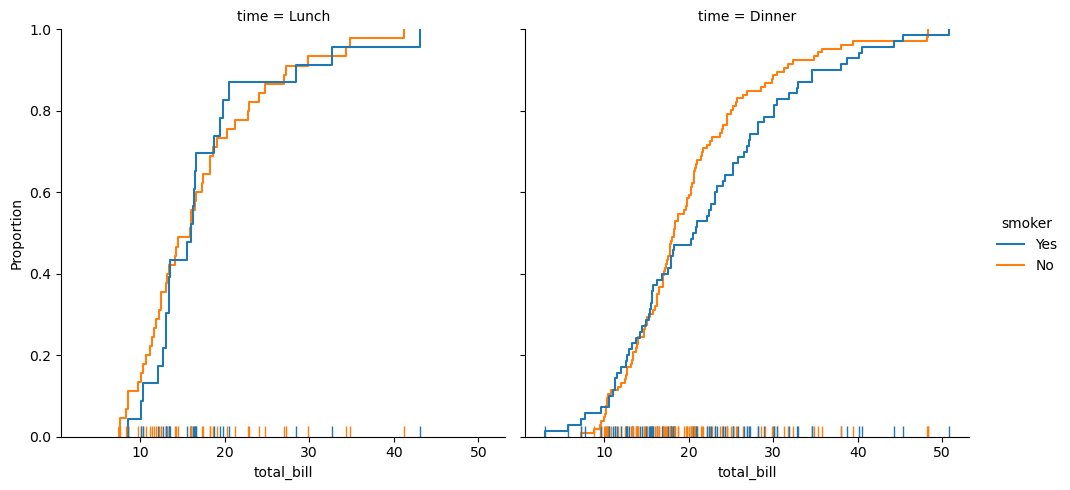

In [13]:
# ecdfplot : Plot empirical cumulative distribution functions.
# rug : bool : If True, show each observation with marginal ticks (as in :func:`rugplot`).

sns.displot(data=tips, kind="ecdf", 
            x="total_bill", col="time", hue="smoker", rug=True)

## Polts for categorical data

catplot()
- seaborn에서 범주형 데이터 시각화를 위한 함수
- 세분화된 수준을 보여줌

swarm plot
- 가장 세분화된 수준에서 모든 관찰값 확인 가능
- 범주형 축을 따라 점들의 위치가 조절되는 scatter plot이므로 서로 겹치지 않음

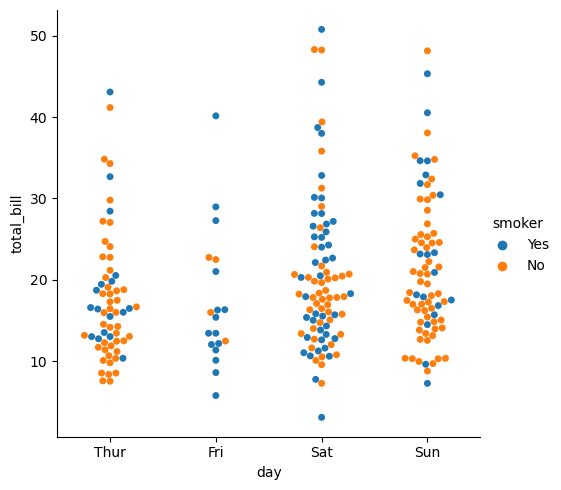

In [5]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

violin plot
- 커널 밀도 추정값 사용

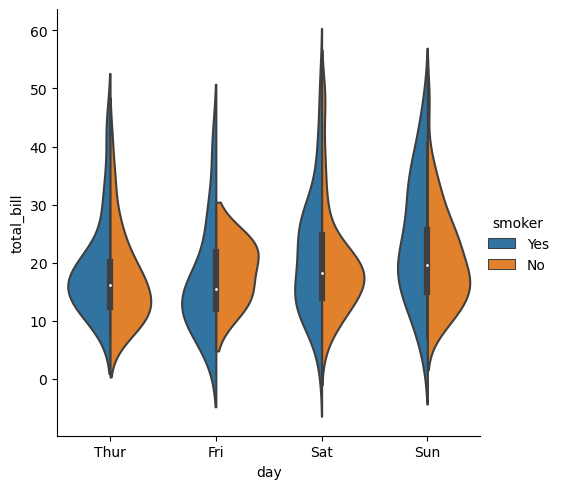

In [6]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

bar plot
- 각 범주 내에서 평균값과 신뢰구간만 표시

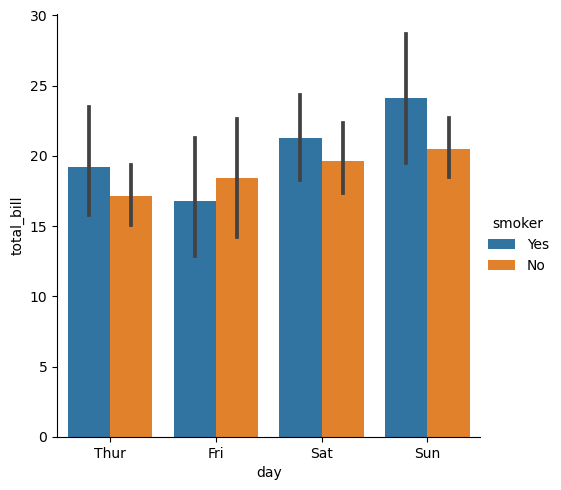

In [7]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")